<a href="https://colab.research.google.com/github/KarinaSelingardi/ScrapyProcuraEmprego/blob/master/C%C3%B3pia_de_C%C3%B3pia_de__ProcuraEmprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

# Ler arquivo CSV
df = pd.read_csv('Catho02.csv')

In [28]:
import pandas as pd


dados = ["São Paulo", "Porto Alegre", "Fortaleza", "Londrina", "Uberlândia", "Rio de Janeiro", "Campinas", "Sorocaba", "Florianópolis", "Maringá", "Curitiba", "Goiânia", "Auxiliar Administrativo", "Assistente Administrativo", "Administração", "Vagas de Home Office"]

# Criar um DataFrame
df = pd.DataFrame(dados, columns=['texto'])

# Aplicar codificação one-hot
df_encoded = pd.get_dummies(df)

# Exibir o DataFrame codificado
print(df_encoded)


    texto_Administração  texto_Assistente Administrativo  \
0                 False                            False   
1                 False                            False   
2                 False                            False   
3                 False                            False   
4                 False                            False   
5                 False                            False   
6                 False                            False   
7                 False                            False   
8                 False                            False   
9                 False                            False   
10                False                            False   
11                False                            False   
12                False                            False   
13                False                             True   
14                 True                            False   
15                False                 

In [29]:



caminho_novo_arquivo = 'dados_codificados.csv'

# Salvo os dados codificados no novo arquivo CSV
df_encoded.to_csv(caminho_novo_arquivo, index=False)


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar dados CSV usando Pandas
data = pd.read_csv('/content/dados_codificados.csv')

# Pré-processamento dos dados
X = data.drop('texto_Administração', axis=1)  # Remover apenas a coluna alvo
y = data['texto_Administração']  # Coluna alvo

# Adicionar as colunas desejadas

X['texto_Campinas'] = data['texto_Campinas']
X['texto_Administração'] = y  # Adicionar a coluna alvo de volta ao DataFrame X

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir modelo de rede neural com Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/10
1/1 [==============================] - 1s 663ms/step - loss: 0.6683 - accuracy: 0.9167 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6508 - accuracy: 1.0000 - val_loss: 0.6864 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 0.6337 - accuracy: 1.0000 - val_loss: 0.6812 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6174 - accuracy: 1.0000 - val_loss: 0.6760 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6012 - accuracy: 1.0000 - val_loss: 0.6710 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 28ms/step - loss: 0.5850 - accuracy: 1.0000 - val_loss: 0.6665 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5692 - accuracy: 1.0000 - val_loss: 0.6623 - val_accuracy: 0.7500
Epoch 8/10
1/1 [==========

In [32]:
# Gerar previsões
predictions = model.predict(X_test)

# Exibir algumas previsões e seus valores reais
for i in range(min(10, len(predictions))):
    print("Previsão:", predictions[i])
    print("Valor real:", y_test.iloc[i])



1/1 [==============================] - 0s 39ms/step
Previsão: [0.40733945]
Valor real: False
Previsão: [0.42516744]
Valor real: False
Previsão: [0.43006718]
Valor real: False
Previsão: [0.38135275]
Valor real: True


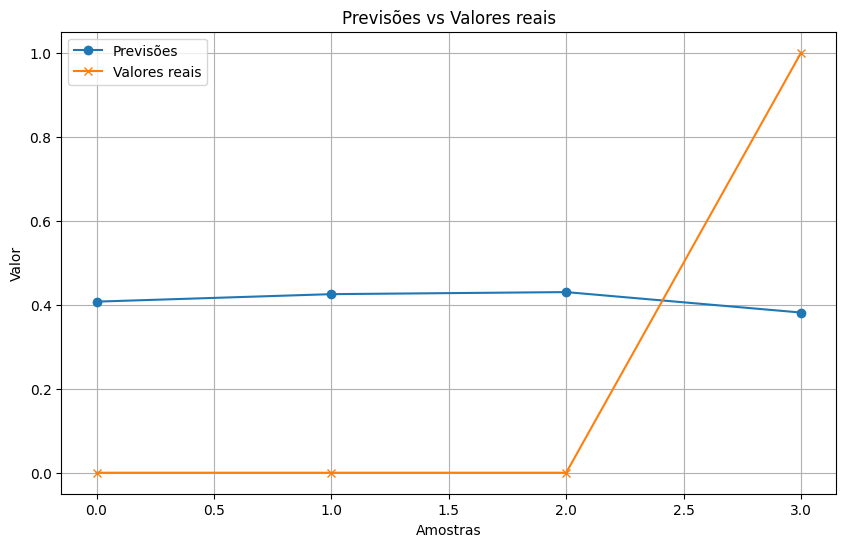

In [33]:
import matplotlib.pyplot as plt

# Exibir algumas previsões e seus valores reais
num_samples = min(10, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples), predictions[:num_samples], label='Previsões', marker='o')
plt.plot(range(num_samples), y_test.iloc[:num_samples], label='Valores reais', marker='x')
plt.title('Previsões vs Valores reais')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 48ms/step


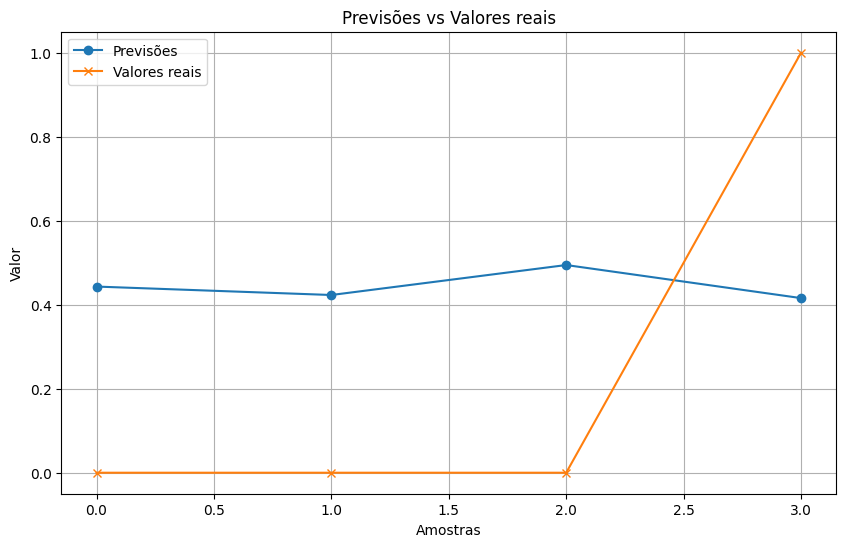

In [ ]:
import matplotlib.pyplot as plt

# Gerar previsões
predictions = model.predict(X_test)

# Exibir algumas previsões e seus valores reais
num_samples = min(10, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples), predictions[:num_samples], label='Previsões', marker='o')
plt.plot(range(num_samples), y_test.iloc[:num_samples], label='Valores reais', marker='x')
plt.title('Previsões vs Valores reais')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [35]:
!wget https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xf spark-3.1.2-bin-hadoop3.2.tgz

--2024-05-20 21:52:36--  https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz.1’

spark-3.1.2-bin-had 100%[===================>] 218.23M  24.5MB/s    in 10s     

2024-05-20 21:52:46 (21.9 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz.1’ saved [228834641/228834641]



In [36]:
import os

os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'

In [37]:
!pip install findspark

import findspark
findspark.init('/content/spark-3.1.2-bin-hadoop3.2')

In [38]:
import pyspark.sql as spark

spark = spark.SparkSession.builder.appName("TesteSpark").getOrCreate()

In [39]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [40]:
dataset = spark.read.csv('/content/dados_codificados.csv',inferSchema=True, header = True)

In [41]:
dataset.printSchema()

root
 |-- texto_Administração: boolean (nullable = true)
 |-- texto_Assistente Administrativo: boolean (nullable = true)
 |-- texto_Auxiliar Administrativo: boolean (nullable = true)
 |-- texto_Campinas: boolean (nullable = true)
 |-- texto_Curitiba: boolean (nullable = true)
 |-- texto_Florianópolis: boolean (nullable = true)
 |-- texto_Fortaleza: boolean (nullable = true)
 |-- texto_Goiânia: boolean (nullable = true)
 |-- texto_Londrina: boolean (nullable = true)
 |-- texto_Maringá: boolean (nullable = true)
 |-- texto_Porto Alegre: boolean (nullable = true)
 |-- texto_Rio de Janeiro: boolean (nullable = true)
 |-- texto_Sorocaba: boolean (nullable = true)
 |-- texto_São Paulo: boolean (nullable = true)
 |-- texto_Uberlândia: boolean (nullable = true)
 |-- texto_Vagas de Home Office: boolean (nullable = true)



In [42]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import pyspark.sql.functions as F
import google.generativeai as genai
import re
import textwrap
from IPython.display import display, Markdown
from google.colab import userdata


# Configuração do Spark
spark = SparkSession.builder.appName("JobBot").getOrCreate()

# Carregar os dados
dataset = spark.read.csv('/content/dados_codificados.csv', inferSchema=True, header=True)

# Criar vetor de features
assembler = VectorAssembler(inputCols=[col for col in dataset.columns if col != 'texto_Administração'], outputCol="features")
dataset = assembler.transform(dataset)

# Funções para o Chatbot
def recommend_jobs(areas, cidades):
  """Recomenda vagas com base nas áreas e cidades fornecidas."""
  filtered_df = dataset
  for area in areas:
    filtered_df = filtered_df.filter(F.col(f"texto_{area}") == True)
  for cidade in cidades:
    filtered_df = filtered_df.filter(F.col(f"texto_{cidade}") == True)
  if filtered_df.count() == 0:
    return "Desculpe, não encontrei nenhuma vaga com essas preferências."

  kmeans = KMeans(featuresCol="features", k=min(3, filtered_df.count()))
  model = kmeans.fit(filtered_df)
  transformed_df = model.transform(filtered_df)

  recommendations = transformed_df.groupBy("prediction").agg(F.first("features").alias("features"))
  result = []
  for row in recommendations.collect():
    features = [col for col, value in zip(dataset.columns, row.features) if value == 1.0 and col != 'features']
    result.append(', '.join(features))
  return "Encontrei estas vagas que podem te interessar:\n" + '\n'.join(result)


def get_user_preferences(user_input):
  """Extrai as preferências do usuário a partir da entrada de texto."""
  areas = []
  cidades = []
  area_match = re.findall(r"Busco vagas em ([\w\s]+)\.", user_input)
  cidade_match = re.findall(r"Quero trabalhar em ([\w\s]+)\.", user_input)
  areas.extend(area_match)
  cidades.extend(cidade_match)
  return areas, cidades

# Configuração do Google Gemini

api_key = userdata.get('SECRET_KEY')
genai.configure(api_key=api_key)
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5,
    "top_p": 1,
}
safety_settings = {
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL': 'BLOCK_NONE',
    'DANGEROUS': 'BLOCK_NONE'
}
model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                             generation_config=generation_config,
                             safety_settings=safety_settings)

# Função para formatar a resposta como Markdown
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Loop principal do chatbot
chat = model.start_chat(history=[])
print("JobBot: Olá! Sou o JobBot, posso te ajudar a encontrar uma vaga. \
       Conte-me sobre suas preferências de emprego. \
       Exemplos: 'Busco vagas em Administração.' ou 'Quero trabalhar em São Paulo.'")

while True:
  try:
    user_input = input("Você: ")
    response = chat.send_message(user_input)
    print("JobBot:", response.text, '\n')

    areas, cidades = get_user_preferences(user_input)
    if areas or cidades:
      recommendations = recommend_jobs(areas, cidades)
      print("JobBot:", recommendations, '\n')
      chat.history.append(genai.ChatMessage(role="user", content=recommendations)) # Adicionar recomendações ao histórico

  except (KeyboardInterrupt, EOFError, SystemExit):
    break

# Imprimir histórico da conversa
print("\nHistórico da Conversa:")
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))
  print('-------------------------------------------')

JobBot: Olá! Sou o JobBot, posso te ajudar a encontrar uma vaga.        Conte-me sobre suas preferências de emprego.        Exemplos: 'Busco vagas em Administração.' ou 'Quero trabalhar em São Paulo.'
Você: me mande o link de vagas de administração do site da Catho, quero vagas que realmente existam
JobBot: **Vagas de Administração no Site da Catho**

**ATENÇÃO:** Os links abaixo levam para páginas de resultados de pesquisa que podem conter vagas que não estão mais disponíveis. Recomenda-se verificar a data de publicação das vagas antes de se candidatar.

* **Gestor Administrativo**
https://www.catho.com.br/vagas/gestor-administrativo/

* **Assistente Administrativo**
https://www.catho.com.br/vagas/assistente-administrativo/

* **Analista Administrativo**
https://www.catho.com.br/vagas/analista-administrativo/

* **Supervisor Administrativo**
https://www.catho.com.br/vagas/supervisor-administrativo/

* **Gerente Administrativo Financeiro**
https://www.catho.com.br/vagas/gerente-adminis

> **user**: me mande o link de vagas de administração do site da Catho, quero vagas que realmente existam

-------------------------------------------


> **model**: **Vagas de Administração no Site da Catho**
> 
> **ATENÇÃO:** Os links abaixo levam para páginas de resultados de pesquisa que podem conter vagas que não estão mais disponíveis. Recomenda-se verificar a data de publicação das vagas antes de se candidatar.
> 
> * **Gestor Administrativo**
> https://www.catho.com.br/vagas/gestor-administrativo/
> 
> * **Assistente Administrativo**
> https://www.catho.com.br/vagas/assistente-administrativo/
> 
> * **Analista Administrativo**
> https://www.catho.com.br/vagas/analista-administrativo/
> 
> * **Supervisor Administrativo**
> https://www.catho.com.br/vagas/supervisor-administrativo/
> 
> * **Gerente Administrativo Financeiro**
> https://www.catho.com.br/vagas/gerente-administrativo-financeiro/
> 
> * **Analista de Controladoria**
> https://www.catho.com.br/vagas/analista-de-controladoria/
> 
> * **Analista de Recursos Humanos**
> https://www.catho.com.br/vagas/analista-de-recursos-humanos/
> 
> * **Analista de Marketing**
> https://www.catho.com.br/vagas/analista-de-marketing/
> 
> * **Analista de Business Intelligence**
> https://www.catho.com.br/vagas/analista-de-business-intelligence/
> 
> * **Analista de Sistemas**
> https://www.catho.com.br/vagas/analista-de-sistemas/

-------------------------------------------


> **user**: agora me mande vagas de TI no site da Catho, vagas que realmente existam 

-------------------------------------------


> **model**: **Vagas de TI no Site da Catho**
> 
> **ATENÇÃO:** Os links abaixo levam para páginas de resultados de pesquisa que podem conter vagas que não estão mais disponíveis. Recomenda-se verificar a data de publicação das vagas antes de se candidatar.
> 
> * **Desenvolvedor de Software**
> https://www.catho.com.br/vagas/desenvolvedor-de-software/
> 
> * **Analista de Sistemas**
> https://www.catho.com.br/vagas/analista-de-sistemas/
> 
> * **Arquiteto de Soluções**
> https://www.catho.com.br/vagas/arquiteto-de-solucoes/
> 
> * **Gerente de Projetos de TI**
> https://www.catho.com.br/vagas/gerente-de-projetos-de-ti/
> 
> * **Administrador de Redes**
> https://www.catho.com.br/vagas/administrador-de-redes/
> 
> * **Analista de Segurança da Informação**
> https://www.catho.com.br/vagas/analista-de-seguranca-da-informacao/
> 
> * **Especialista em Big Data**
> https://www.catho.com.br/vagas/especialista-em-big-data/
> 
> * **Cientista de Dados**
> https://www.catho.com.br/vagas/cientista-de-dados/
> 
> * **Engenheiro de DevOps**
> https://www.catho.com.br/vagas/engenheiro-de-devops/
> 
> * **Analista de Business Intelligence**
> https://www.catho.com.br/vagas/analista-de-business-intelligence/

-------------------------------------------
